<a href="https://colab.research.google.com/github/afonsosr2/data_vis_seaborn_alura/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a base de dados

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/afonsosr2/data_vis_seaborn_alura/main/tips.csv"
dados = pd.read_csv(url)

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [4]:
dados.columns = ["valor_da_conta", "gorjeta", "sobremesa", "dia_da_semana", "hora_do_dia", "total_de_pessoas"]
gorjetas = dados[:]

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
sim_nao = {'No':'Não', 'Yes': 'Sim'}
gorjetas.sobremesa.replace(sim_nao, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [6]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3


In [7]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
dias = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'}
gorjetas.dia_da_semana.replace(dias, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
gorjetas.sample(7)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
143,27.05,5.00,Não,Quinta,Lunch,6
45,18.29,3.00,Não,Domingo,Dinner,2
81,16.66,3.40,Não,Quinta,Lunch,2
228,13.28,2.72,Não,Sábado,Dinner,2
8,15.04,1.96,Não,Domingo,Dinner,2
155,29.85,5.14,Não,Domingo,Dinner,5
110,14.00,3.00,Não,Sábado,Dinner,2


In [10]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
refeicao = {'Lunch': 'Almoço', 'Dinner': 'Jantar'}
gorjetas.hora_do_dia.replace(refeicao, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
112,38.07,4.00,Não,Domingo,Jantar,3
138,16.00,2.00,Sim,Quinta,Almoço,2
216,28.15,3.00,Sim,Sábado,Jantar,5
65,20.08,3.15,Não,Sábado,Jantar,3
185,20.69,5.00,Não,Domingo,Jantar,5


# Importando o Seaborn

In [13]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 34.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [14]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Análise 1 - Valor da conta e gorjeta

In [15]:
gorjetas.columns    

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

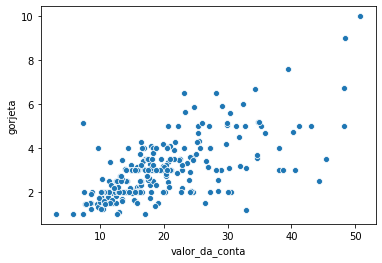

In [16]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [17]:
print(f"A base de dados contem {gorjetas.shape[0]} registros")
print("Registros não nulos:")
gorjetas.count()

A base de dados contem 244 registros
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [18]:
gorjetas['porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [20]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)*100

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0


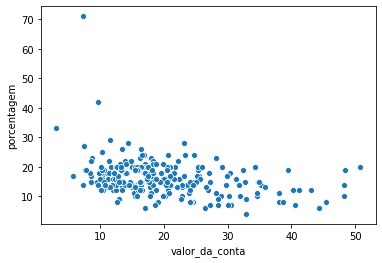

In [22]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

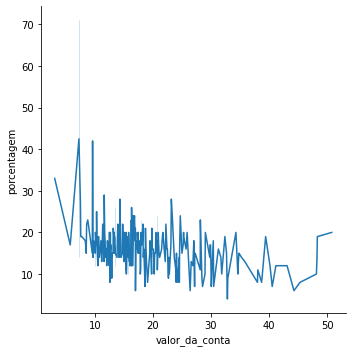

In [23]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

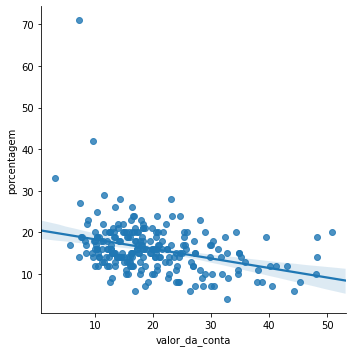

In [24]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#Análise 2 - Sobremesas

In [25]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0
3,23.68,3.31,Não,Domingo,Jantar,2,14.0
4,24.59,3.61,Não,Domingo,Jantar,4,15.0


In [26]:
gorjetas[gorjetas.sobremesa == "Sim"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.322581
std,9.832154,1.401468,0.810751,8.505959
min,3.070000,1.000000,1.000000,4.000000
25%,13.420000,2.000000,2.000000,11.000000
50%,17.920000,3.000000,2.000000,15.000000
75%,26.860000,3.680000,3.000000,20.000000
max,50.810000,10.000000,5.000000,71.000000


In [27]:
gorjetas[gorjetas.sobremesa == "Não"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.953642
std,8.255582,1.377190,1.017984,3.988881
min,7.250000,1.000000,1.000000,6.000000
25%,13.325000,2.000000,2.000000,14.000000
50%,17.590000,2.740000,2.000000,16.000000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.000000


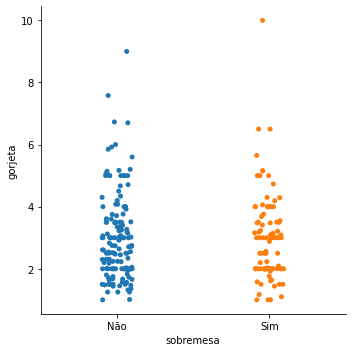

In [28]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

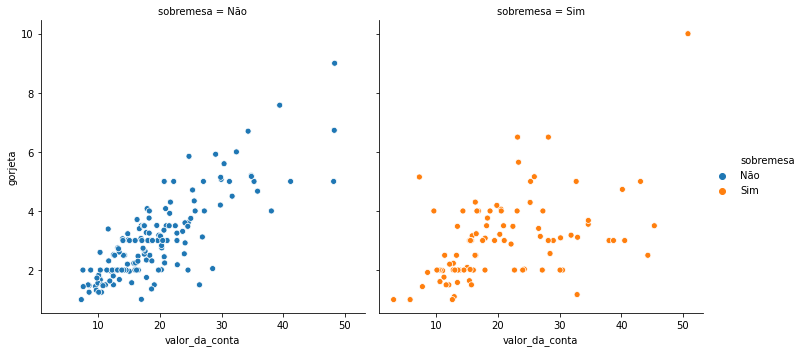

In [29]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

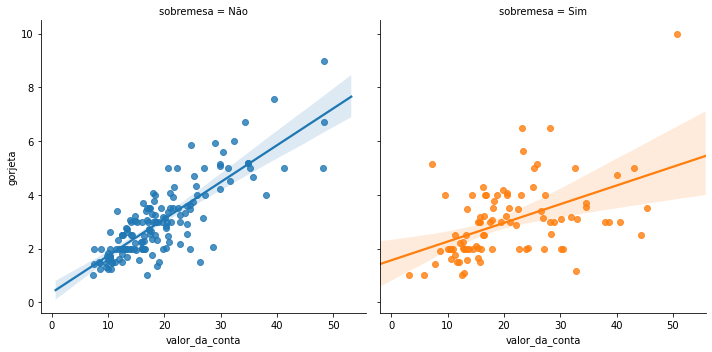

In [30]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

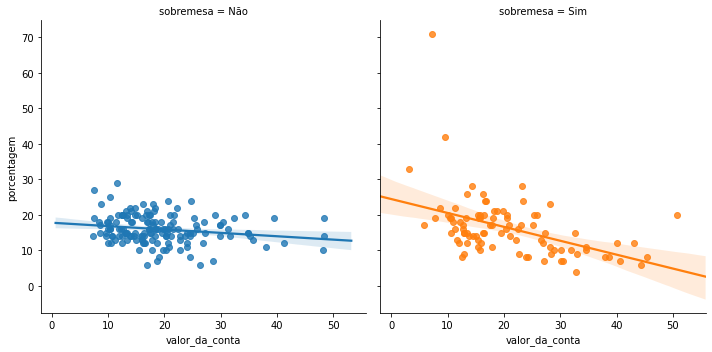

In [31]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

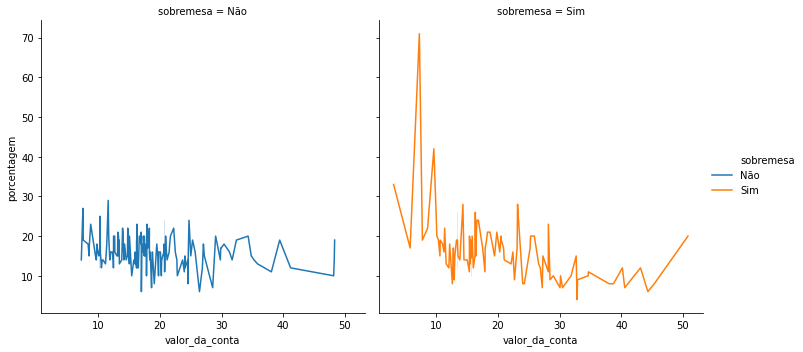

In [32]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Visualmente existe uma diferença no valor da gorjeta daqueles que pediram e dos que não pediram sobremesa**

##Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [33]:
from scipy.stats import ranksums

In [34]:
sobremesa = gorjetas.query('sobremesa== "Sim"').porcentagem

In [35]:
sem_sobremesa = gorjetas.query('sobremesa== "Não"').porcentagem

In [36]:
r = ranksums(sobremesa,sem_sobremesa)

In [37]:
print(f"O valor do p-value {r.pvalue}")

O valor do p-value 0.5266635660124415


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [38]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0
3,23.68,3.31,Não,Domingo,Jantar,2,14.0
4,24.59,3.61,Não,Domingo,Jantar,4,15.0


In [39]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

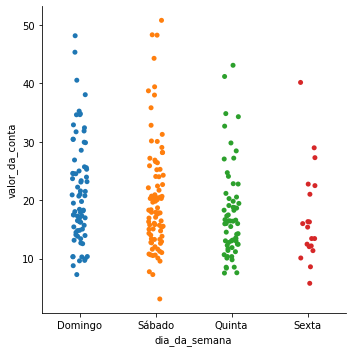

In [40]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

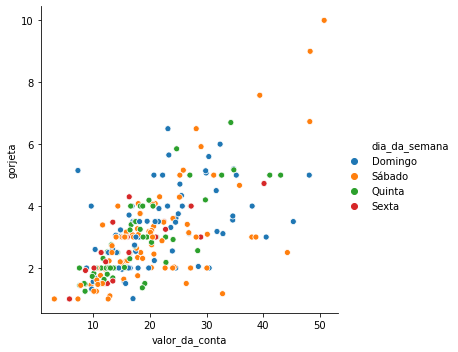

In [41]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

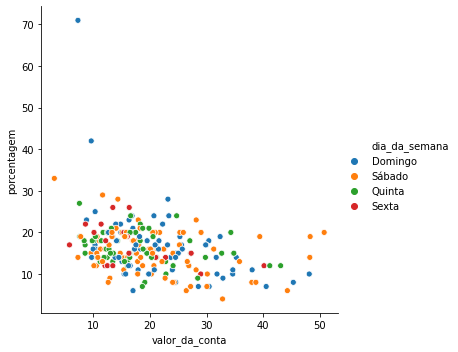

In [42]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

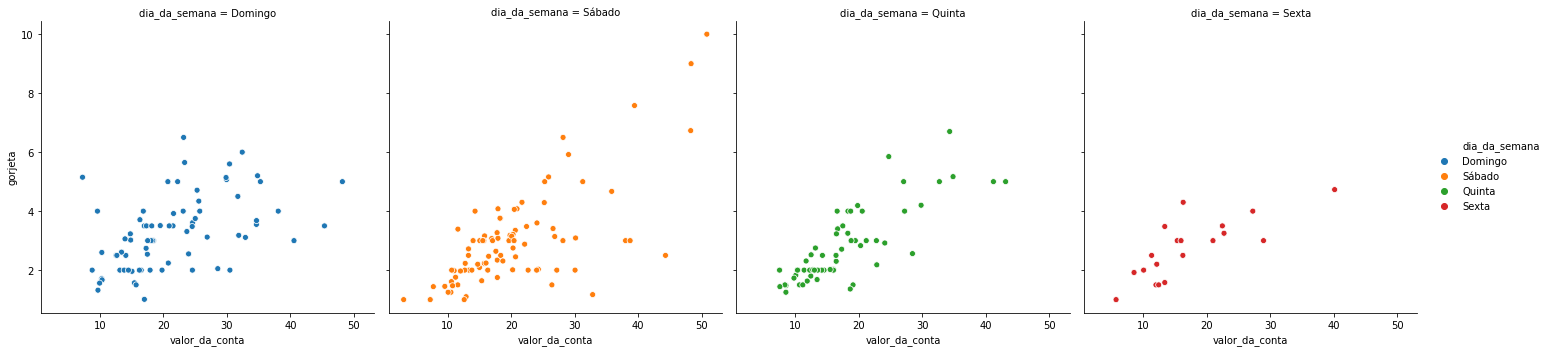

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

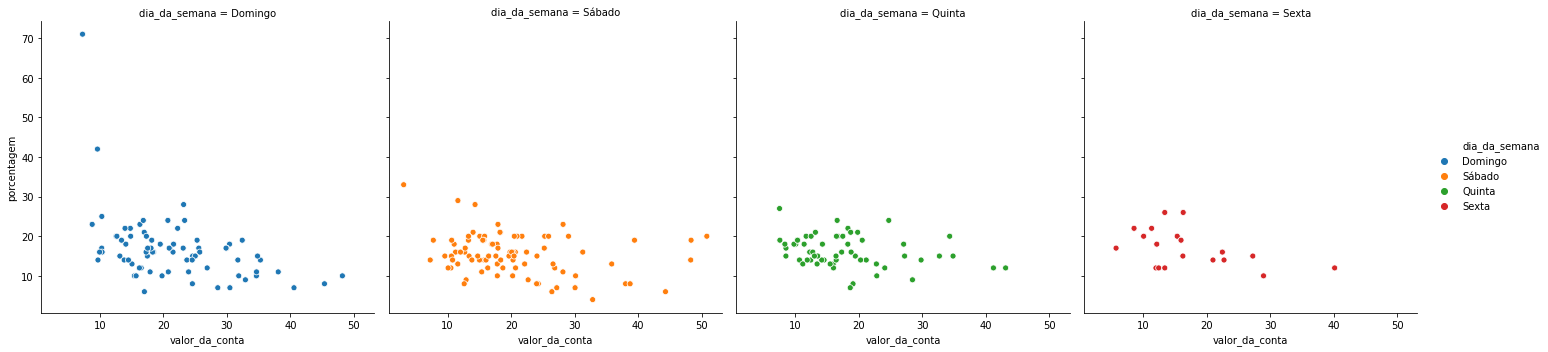

In [44]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

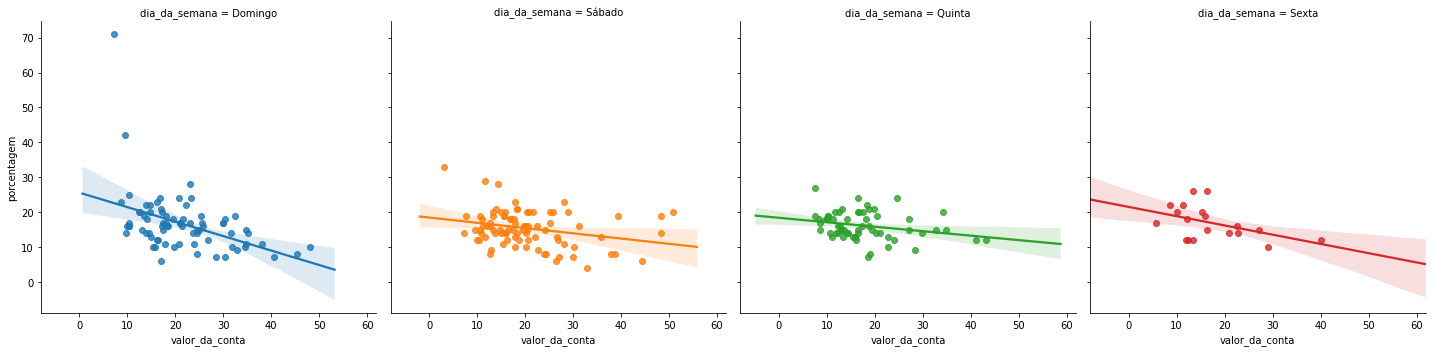

In [45]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [46]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [47]:
print(f"A média das gorjetas é de {media_geral_gorjetas:.3f}")

A média das gorjetas é de 2.998


In [48]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.697368
Quinta,17.682742,2.771452,16.112903
Sexta,17.151579,2.734737,16.947368
Sábado,20.441379,2.993103,15.367816


In [49]:
print("Frequência dos dias:")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [50]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [51]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [52]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f"O valor do p-value= {r2.pvalue} ")

O valor do p-value= 0.3576728477868443 


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Refeição

In [55]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0
3,23.68,3.31,Não,Domingo,Jantar,2,14.0
4,24.59,3.61,Não,Domingo,Jantar,4,15.0


In [53]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

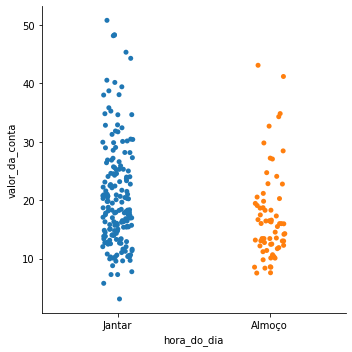

In [56]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

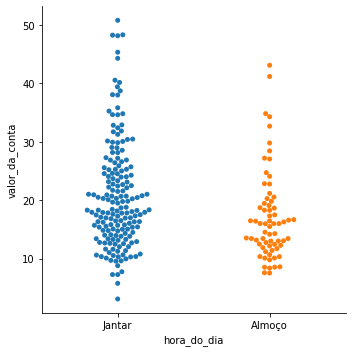

In [57]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

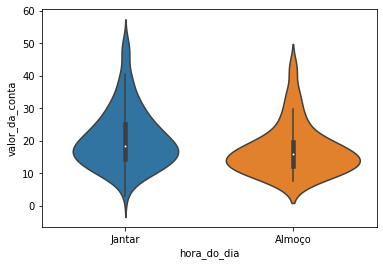

In [58]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

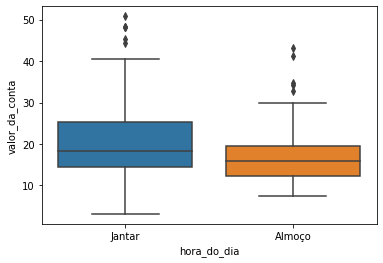

In [59]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [60]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

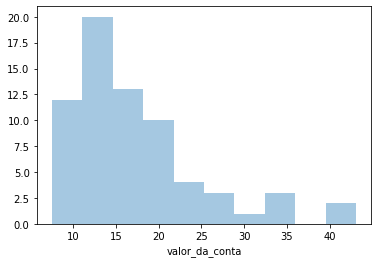

In [61]:
sns.distplot(almoco, kde=False)

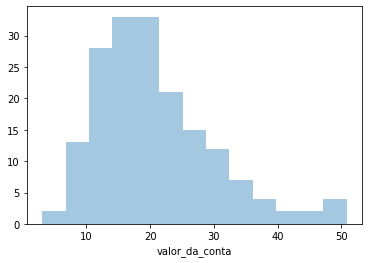

In [62]:
sns.distplot(jantar, kde=False)

In [63]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.397059
Jantar,20.797159,3.102670,15.977273


## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no almoço e no jantar**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no almoço e no jantar**

In [65]:
r3 = ranksums(almoco, jantar)
print(f"O valor do p-value é {r3.pvalue}")

O valor do p-value é 0.0011791039723641672


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no almoço e no jantar**

<hr>

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no almoço e no jantar**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no almoço e no jantar**

In [67]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [68]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [69]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar )
print(f"O valor do p-value é {r4.pvalue}")

O valor do p-value é 0.2602493995587126


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no almoço e no jantar**